In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("advertising.csv",encoding='ISO-8859-1')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### There is no missing value in the dataset

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.duplicated().sum()

np.int64(0)

# Checking Distribution

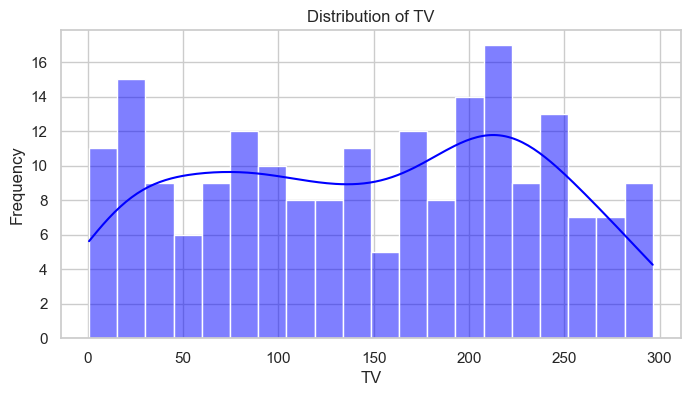

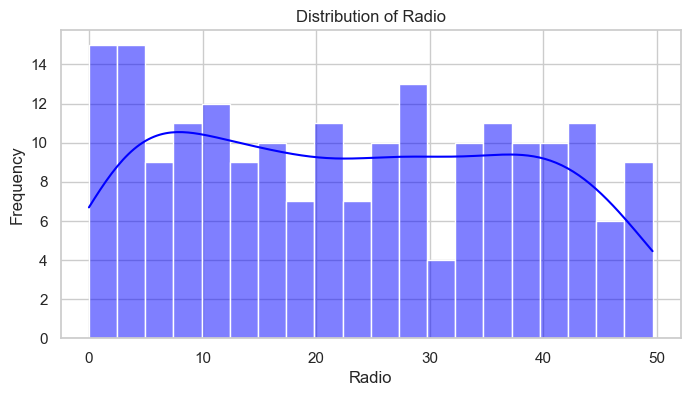

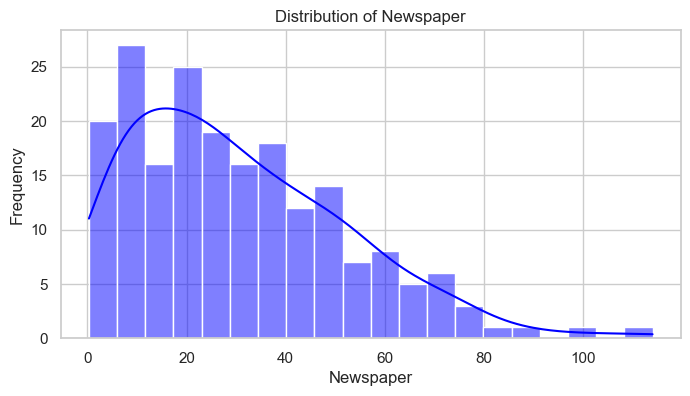

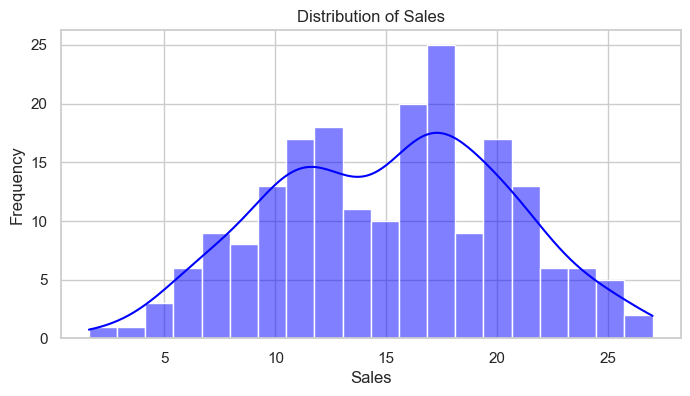

In [9]:
sns.set(style="whitegrid")
features = ['TV', 'Radio', 'Newspaper', 'Sales']

for feature in features:
    plt.figure(figsize=(8, 4)) 
    plt.title(f'Distribution of {feature}')
    
    
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Summary of Distributions:

* **Radio**: Roughly symmetric and close to normal distribution.
* **Newspaper**: Positively skewed with fewer high-value points.
* **Sales**: Nearly symmetric but not perfectly so.
* **TV**: Skewed toward higher values, indicating higher ad spending.

In [10]:
correlation_tv = df['TV'].corr(df['Sales'])
correlation_radio = df['Radio'].corr(df['Sales'])
correlation_newspaper = df['Newspaper'].corr(df['Sales'])

strongest_channel = max(
    [('TV',abs(correlation_tv)), ('Radio', abs(correlation_radio)), ('Newspaper', abs(correlation_newspaper))],
    key= lambda x: x[1]
)
print(f"The channel with the strongest impact on Sales is{strongest_channel}")

The channel with the strongest impact on Sales is('TV', np.float64(0.9012079133023306))


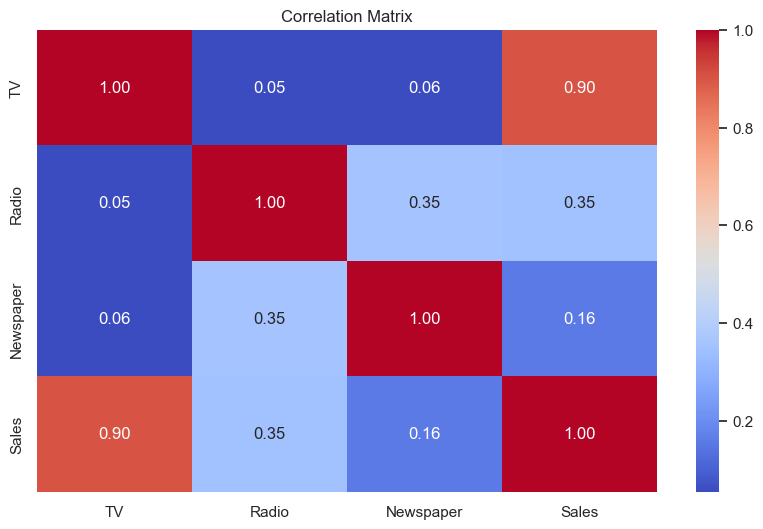

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
df['Total spent'] = df['TV']+ df['Newspaper'] + df['Radio']
df.head()

,TV,Radio,Newspaper,Sales,Total spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


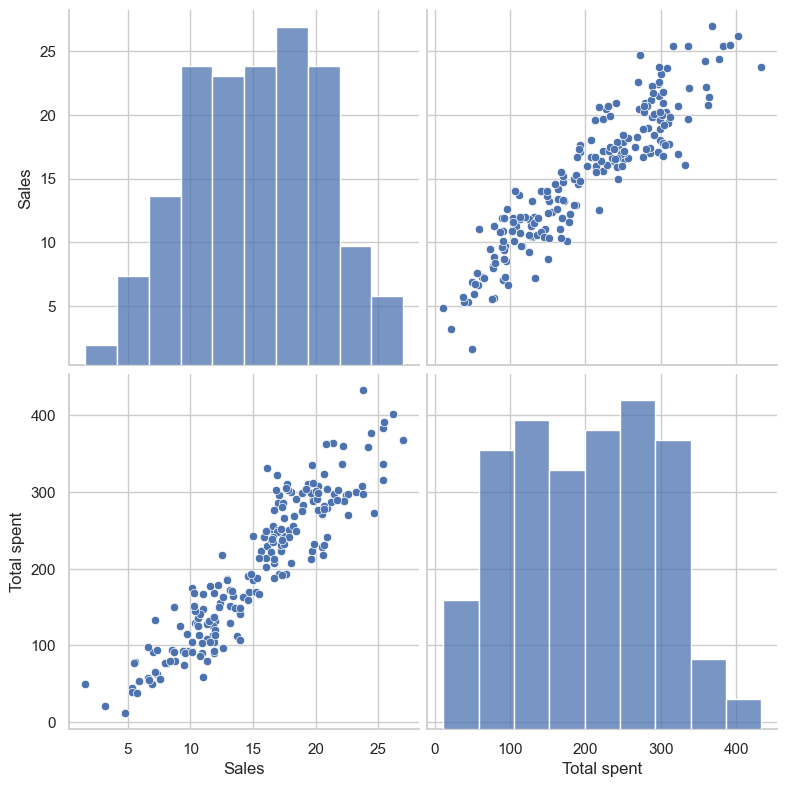

In [13]:
pairplot_data = df[['Sales', 'Total spent']]


sns.set(style="whitegrid")
sns.pairplot(pairplot_data, height=4)
plt.show()

- **The scatter plot shows a positive linear correlation between Sales and Total spent, indicating that higher advertising spending is associated with increased sales.**

# Box Plot

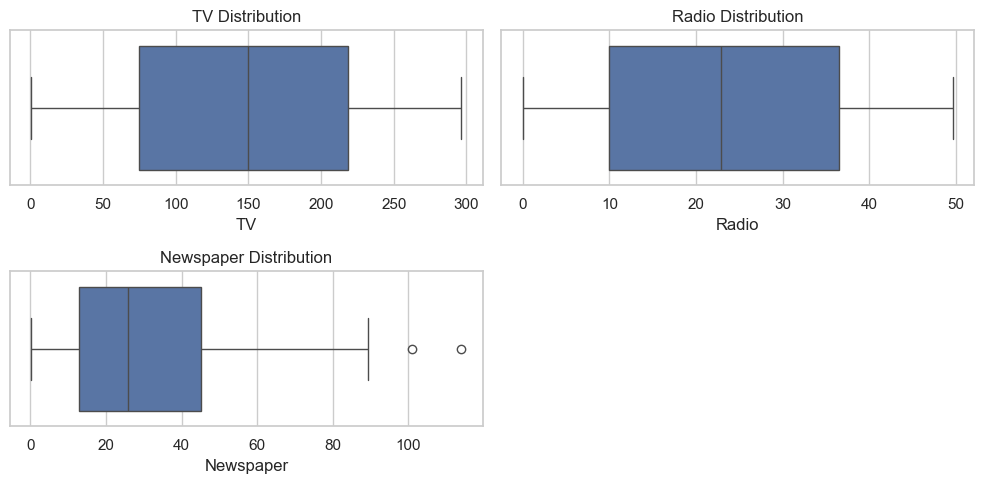

In [14]:
cols = ['TV', 'Radio','Newspaper']


def remove_outliers(df, columns,threshold =10):

    df_cleaned = df.copy()
    for column in columns:

         z_scores = (df[column]- df[column].mean())/df[column].std()
         outliers = df_cleaned.loc[abs(z_scores)> threshold]
         df_cleaned = df_cleaned.drop(outliers.index)
    return df_cleaned
df = remove_outliers(df,cols)


plt.figure(figsize=(10, 5))
for i, column in enumerate(cols):
    plt.subplot(len(cols)//2 + len(cols)%2, 2, i+1)
    sns.boxplot(data=df, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()


In [15]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Modeling

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Feature scaling using Min-Max scaling
scaler1 = MinMaxScaler()
X = scaler1.fit_transform(X)
# Save the scaler to a file
joblib.dump(scaler1, 'scaler.pkl')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()

lr_model = lr.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE train:", mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:",r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:", r2_test)

MSE train: 2.6761426537826685
MSE test: 2.907756910271094
R2 train: 0.9001416005862131
R2 test: 0.9059011844150825


# Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=34)

dtr_model = dtr.fit(X_train, y_train)

y_train_pred = dtr_model.predict(X_train)
y_test_pred = dtr_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE train:", mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:",r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:",r2_test)

MSE train: 0.0
MSE test: 2.9334999999999996
R2 train: 1.0
R2 test: 0.905068104371689


# Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the training and test data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate regression metrics
mse_train = mean_squared_error(y_train,y_train_pred)
print("Mse train:",mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mse test:",mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:", r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:",r2_test)

Mse train: 0.23189817499999793
Mse test: 1.4383176500000008
R2 train: 0.9913468810977822
R2 test: 0.953454160207889


# XGBoost

In [20]:
import xgboost as xgb
# Instantiate an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)


xgb_model.fit(X_train, y_train)


y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE train:", mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE test:", mse_test)
r2_train = r2_score(y_train, y_train_pred)
print("R2 train:", r2_train)
r2_test = r2_score(y_test, y_test_pred)
print("R2 test:", r2_test)

MSE train: 3.059822136335994e-06
MSE test: 1.4514290545159532
R2 train: 0.9999998858248679
R2 test: 0.953029858014247


In [22]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Repeating with narrowed grid (if needed)
param_grid = {
    'max_depth': [best_params['max_depth']],
    'n_estimators': [best_params['n_estimators']]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_n_estimators = grid_search.best_params_['n_estimators']

# Final model training
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                  max_depth=best_max_depth,
                                  n_estimators=best_n_estimators,
                                  random_state=42)
best_xgb_model.fit(X_train, y_train)

# Predictions on test set
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Predictions on training set
y_train_pred = best_xgb_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Output
print(f"Best max_depth: {best_max_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")
print(f"Train MSE: {mse_train}")
print(f"Train R²: {r2_train}")


Best Hyperparameters: {'max_depth': 7, 'n_estimators': 200}
Best max_depth: 7
Best n_estimators: 200
Test MSE: 1.5453199364693477
Test R²: 0.9499914263094406
Train MSE: 1.6504326463859713e-06
Train R²: 0.9999999384152551


### Model Performance Table

| Model                 | MSE (Train) | MSE (Test) | R² (Train) | R² (Test) | Notes                                                       |
| --------------------- | ----------- | ---------- | ---------- | --------- | ----------------------------------------------------------- |
| **Linear Regression** | 2.6761      | 2.9078     | 0.9001     | 0.9059    | —                                                           |
| **Decision Tree**     | 0.0000      | 2.9335     | 1.0000     | 0.9051    | Likely overfitting                                          |
| **Random Forest**     | 0.2319      | 1.4383     | 0.9913     | 0.9535    | Good generalization                                         |
| **XGBoost**           | 0.00000306  | 1.4514     | 1.0000     | 0.9530    | Very close fit                                              |
| **Improved XGBoost**  | 0.00000165  | 1.5453     | 0.99999994 | 0.9500    | Tuned with GridSearchCV (`max_depth=7`, `n_estimators=200`) |

### ✅ **Best Overall Model: `Random Forest Regressor`**

#### Why?

* **Test R²** = **0.9535** (highest)
* **Test MSE** = **1.4383** (lowest)
* **Train vs Test gap** is small → **good generalization**
* Less overfitting than XGBoost models (which have near-perfect train scores)

---

### 📌 Notes:

* **XGBoost** and **Improved XGBoost** have **perfect/near-perfect train scores**, but slightly worse test performance, suggesting **mild overfitting**.
* **Decision Tree** has perfect train fit but much worse test performance → **clear overfitting**.
* **Linear Regression** is simplest and performs decently but not as well as ensemble models.

---

### 🏁 Conclusion:

Use **Random Forest Regressor** if your goal is **robust, generalizable performance**.


### ✅ **Reasons Why Random Forest Regressor is Best:**

1. **💯 Best Generalization (Balance Between Train and Test Performance)**

   * **Train R² = 0.9913**, **Test R² = 0.9535** → small difference means it learns well without overfitting.
   * In contrast, XGBoost and Decision Tree models achieve perfect or near-perfect training scores but slightly worse test scores, indicating **overfitting**.

2. **📉 Lowest Test MSE**

   * Random Forest has the **lowest Test MSE = 1.4383**, meaning its predictions on new/unseen data are the most accurate.

3. **📊 High Test R² (Accuracy on Unseen Data)**

   * Test R² = **0.9535**, the highest among all models. This means Random Forest explains **95.35%** of the variance in the test data — better than all other models.

4. **🌲 Ensemble Strength**

   * Random Forest is an ensemble of many decision trees, which reduces the risk of **overfitting** that you see in a single decision tree or untuned XGBoost.

5. **🚀 Improved XGBoost overfits slightly more**

   * It has an **almost perfect train R² (0.9999999)** but **slightly lower test R² (0.9500)** than Random Forest — indicating it's fitting the training data **too closely**.

---

### 🧠 Final Thought:

Even though XGBoost is powerful, **Random Forest performs the best in your case** — offering **excellent accuracy** with **better reliability** on test data.


# Save the Trained Model to a File

In [23]:
# Save the trained model to a file
joblib.dump(rf_regressor, 'Sales1_rf_model.pkl')

['Sales1_rf_model.pkl']

# Testing

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load the pre-trained Random Forest model
rf_model = joblib.load('Sales1_rf_model.pkl')

# Load the scaler used for feature scaling
scaler = joblib.load('scaler.pkl')

# Prepare input data for prediction
input_data = pd.DataFrame({
    'TV': [34],  
    'Radio': [23.3],
    'Newspaper': [45.1]
})

# Scale the input data using the same scaler
input_data_scaled = scaler.transform(input_data)

# Make predictions
prediction = rf_model.predict(input_data_scaled)

# Display the predicted sales
print(f"Predicted Sales: {prediction[0]} units")


Predicted Sales: 8.594000000000001 units
